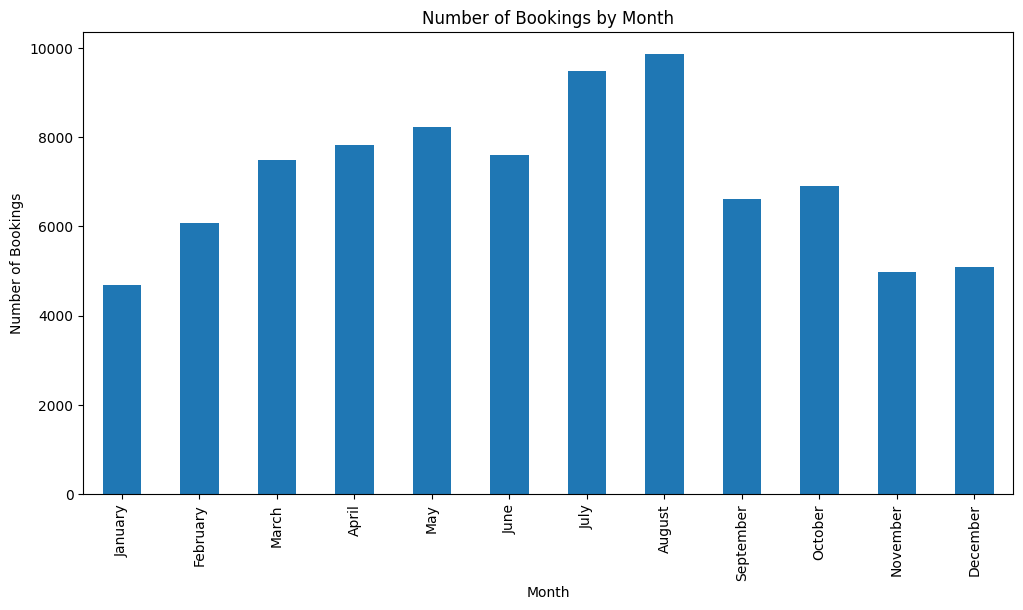


Overall Cancellation Rate: 27.16%


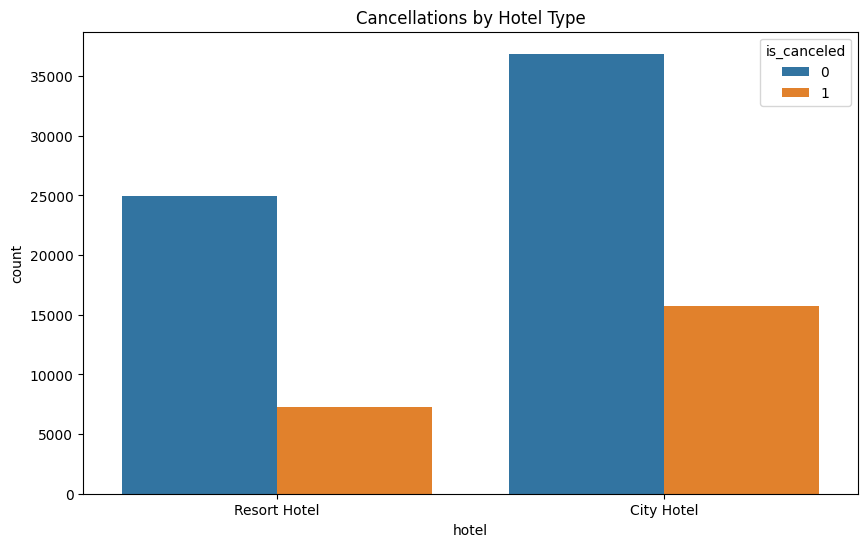


Cancellation Rate by Hotel Type:
hotel
City Hotel      29.950048
Resort Hotel    22.604247
Name: is_canceled, dtype: float64


<ipython-input-13-e406f574d656>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='total_nights', data=df, palette="Set3", width=0.6)


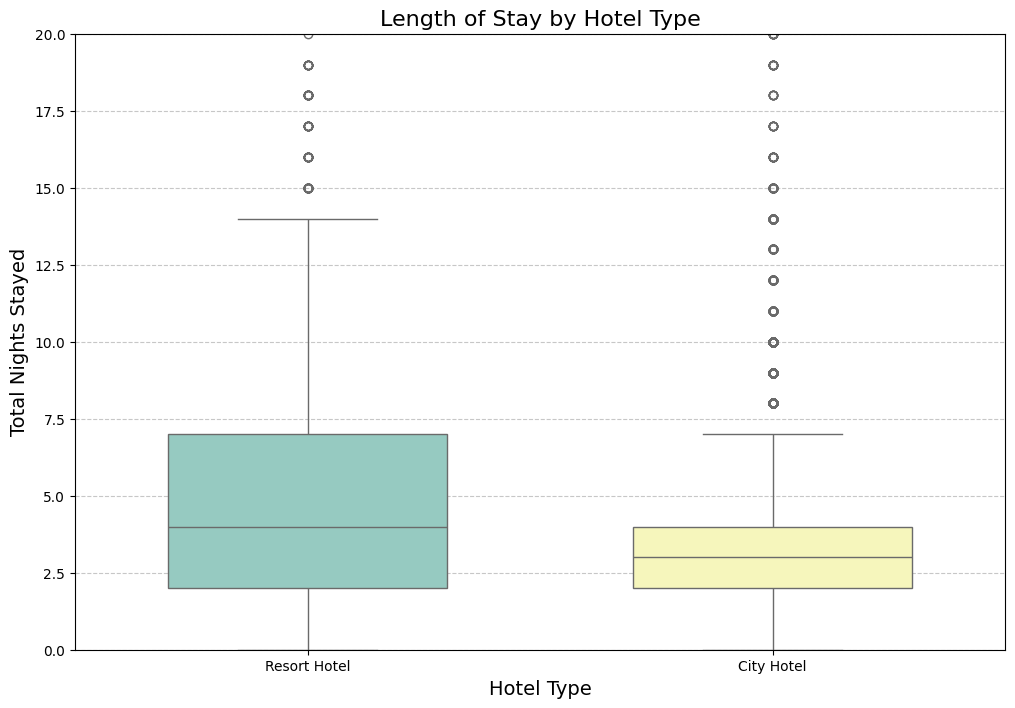


Average Length of Stay by Hotel Type:
hotel
City Hotel      3.149418
Resort Hotel    4.372562
Name: total_nights, dtype: float64


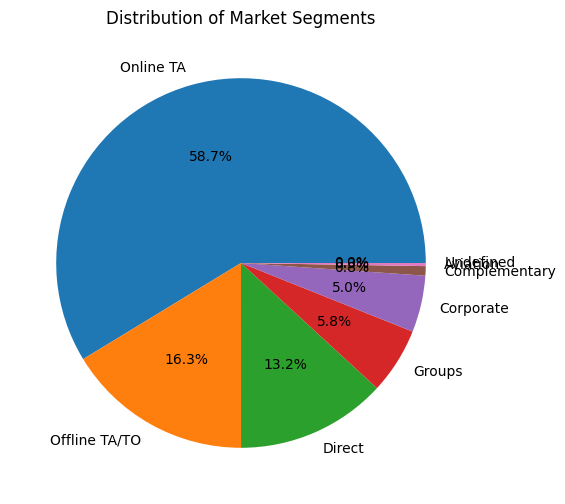


Market Segment Distribution (%):
market_segment
Online TA        58.704921
Offline TA/TO    16.298024
Direct           13.154547
Groups            5.789932
Corporate         4.956069
Complementary     0.826797
Aviation          0.267354
Undefined         0.002356
Name: proportion, dtype: float64


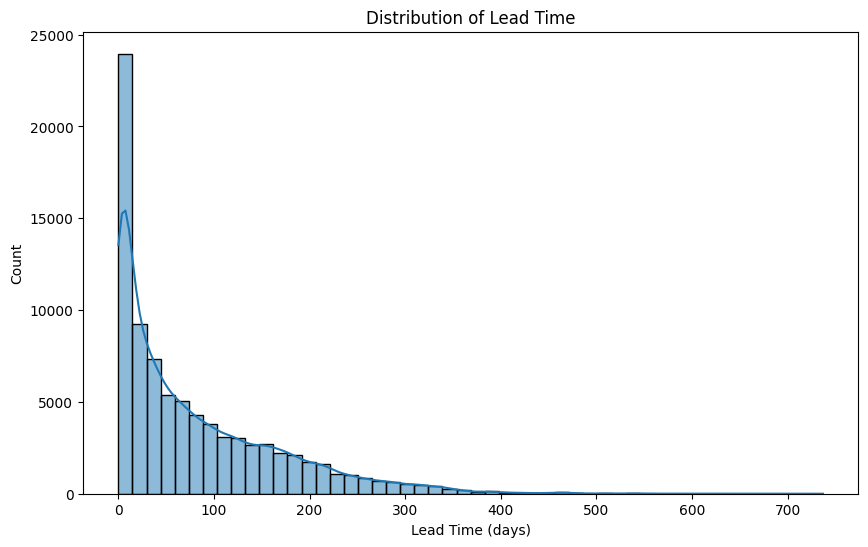


Average Lead Time: 80.14 days
Median Lead Time: 49.00 days


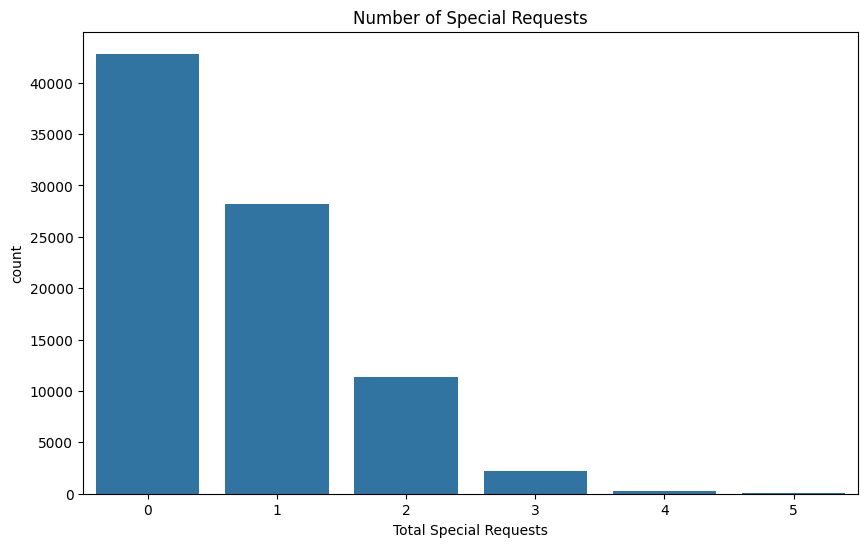


Frequency of Special Requests (%):
total_of_special_requests
0    50.426354
1    33.193178
2    13.410124
3     2.587567
4     0.343910
5     0.038867
Name: proportion, dtype: float64


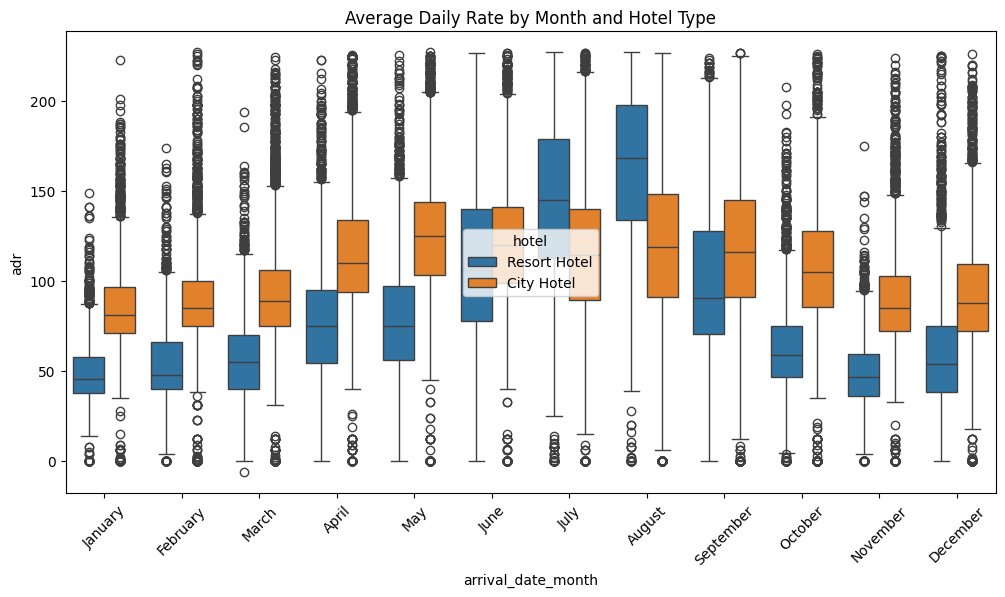

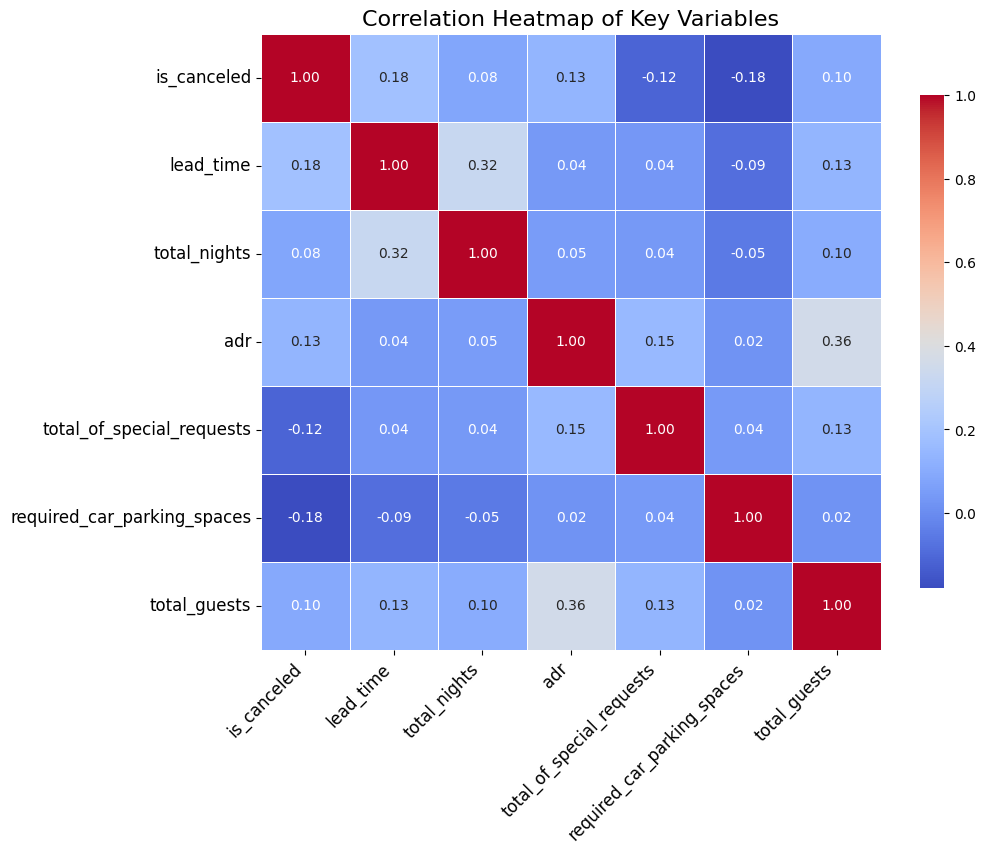

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data (adjust the path as necessary)
df = pd.read_csv('/content/cleaned_hotel_booking.csv')

# Map the months to ensure they are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# 1. Seasonal Demand Analysis
plt.figure(figsize=(12, 6))
monthly_bookings = df['arrival_date_month'].value_counts().sort_index()
monthly_bookings.plot(kind='bar')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()


# 2. Cancellation Analysis
cancellation_rate = df['is_canceled'].mean() * 100
print(f"\nOverall Cancellation Rate: {cancellation_rate:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellations by Hotel Type')
plt.show()

cancellation_by_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
print("\nCancellation Rate by Hotel Type:")
print(cancellation_by_hotel)


# 3. Length of Stay Analysis
# Calculate total nights stayed by adding weekend and weeknight stays
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# Plotting the distribution of total nights by hotel type with enhancements
plt.figure(figsize=(12, 8))
sns.boxplot(x='hotel', y='total_nights', data=df, palette="Set3", width=0.6)
plt.title('Length of Stay by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Total Nights Stayed', fontsize=14)
plt.ylim(0, 20)  # Limit y-axis to remove extreme outliers
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Calculate and display the average length of stay by hotel type
avg_stay = df.groupby('hotel')['total_nights'].mean()

print("\nAverage Length of Stay by Hotel Type:")
print(avg_stay)


# 4. Market Segment Analysis
plt.figure(figsize=(10, 6))
df['market_segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Market Segments')
plt.ylabel('')
plt.show()

market_segment_distribution = df['market_segment'].value_counts(normalize=True) * 100
print("\nMarket Segment Distribution (%):")
print(market_segment_distribution)


# 5. Lead Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.show()

avg_lead_time = df['lead_time'].mean()
median_lead_time = df['lead_time'].median()
print(f"\nAverage Lead Time: {avg_lead_time:.2f} days")
print(f"Median Lead Time: {median_lead_time:.2f} days")


# 6. Special Requests Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=df)
plt.title('Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.show()

special_requests_freq = df['total_of_special_requests'].value_counts(normalize=True) * 100
print("\nFrequency of Special Requests (%):")
print(special_requests_freq)


# 7. Additional Analysis: ADR by Hotel Type and Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='arrival_date_month', y='adr', hue='hotel', data=df,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December'])
plt.title('Average Daily Rate by Month and Hotel Type')
plt.xticks(rotation=45)
plt.show()


# 8. Correlation Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select key columns for correlation analysis
key_columns = ['is_canceled', 'lead_time', 'total_nights', 'adr',
               'total_of_special_requests', 'required_car_parking_spaces', 'total_guests']
correlation_matrix = df[key_columns].corr()

# Plotting the correlation heatmap with the selected key columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Key Variables', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()
